In [ ]:
# reproduce figure 2, panel c

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import hvplot
from matplotlib import cm
from datetime import datetime
from pyproj import Transformer
from scipy.ndimage import convolve

%run -i ncbx_funcs.py

ds_CSYV

Shape of xisl, yisl:  (1057, 1317) (1057, 1317)
Index of shoreline and y-location:
[168] [329.27781985]
Offshore model domain (dy_offshore):  [4453.85735021] , onshore (dy_onshore):  [5530.01136684]


<xarray.Dataset> Size: 35GB
Dimensions:                 (tracer: 4, NST: 3, s_rho: 8, s_w: 9,
                             eta_rho: 1057, xi_rho: 1317, eta_u: 1057,
                             xi_u: 1316, eta_v: 1056, xi_v: 1317,
                             eta_psi: 1056, xi_psi: 1316, ocean_time: 37,
                             NVEG: 3, Nbed: 1)
Coordinates:
  * s_rho                   (s_rho) float64 64B -0.9375 -0.8125 ... -0.0625
  * s_w                     (s_w) float64 72B -1.0 -0.875 -0.75 ... -0.125 0.0
    lon_rho                 (eta_rho, xi_rho) float64 11MB -76.13 ... -76.19
    lat_rho                 (eta_rho, xi_rho) float64 11MB 34.94 34.94 ... 35.02
    lon_u                   (eta_u, xi_u) float64 11MB ...
    lat_u                   (eta_u, xi_u) float64 11MB ...
    lon_v                   (eta_v, xi_v) float64 11MB ...
    lat_v                   (eta_v, xi_v) float64 11MB ...
    lon_psi                 (eta_psi, xi_psi) float64 11MB ...
    lat_psi                 (eta_psi, xi_psi) float64 11MB ...
  * ocean_time              (ocean_time) datetime64[ns] 296B 2019-09-06T10:15...
Dimensions without coordinates: tracer, NST, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi, NVEG, Nbed
Data variables: (12/182)
    ntimes                  int32 4B ...
    ndtfast                 int32 4B ...
    dt                      float64 8B ...
    dtfast                  float64 8B ...
    dstart                  datetime64[ns] 8B ...
    nHIS                    int32 4B ...
    ...                      ...
    Dwave                   (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Pwave_top               (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_fric             (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_break            (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_wcap             (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_roller           (ocean_time, eta_rho, xi_rho) float32 206MB ...
Attributes: (12/33)
    file:                      ./Output/Dorian_NCB_his_00019.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian North Core Banks
    var_info:                  varinfo.dat
    ...                        ...
    tiling:                    015x012
    history:                   ROMS/TOMS, Version 3.9, Saturday - October 15,...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               COREBANKS, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX,...
    EXTRA_DIMENSION.N:         8
    EXTRA_DIMENSION.boundary:  4

Contour intervals:  [-10.  -8.  -6.  -4.  -2.   0.   2.]


C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_22104\2634976539.py:19: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0 = ax0.pcolormesh(xisl,yisl, bathi,cmap='terrain',vmin=-4,vmax=5)


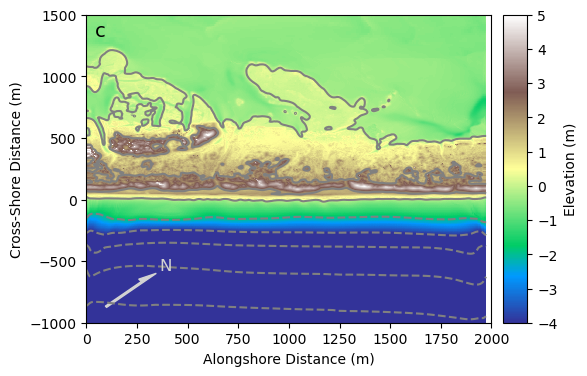

In [14]:
# smooth bathy for making contour maps
# experimenting with size of kernal suggest 15 is ok
ik = 15
k = np.ones((ik, ik)) / (ik*ik)
bathis = convolve(bathi,k,mode='nearest')

#### Initial bathy only
xs = 0
xe = 2000
ys = -1000
ye = 1500
levels = np.array( [-10, -8, -6, -4, -2, 0., 2.] )
print('Contour intervals: ', levels)
# north arrow calcs
# rot = 42
adx,ady = xycoord(.12, 90-42)

fig, ax0 = plt.subplots(1,1,figsize=(6,4),sharex=True)
m0 = ax0.pcolormesh(xisl,yisl, bathi,cmap='terrain',vmin=-4,vmax=5)
m0c = ax0.contour(xisl,yisl, bathis,levels,colors='gray',vmin=-2,vmax=5)
# ax0.plot(650,750,'oy',label='Sound')
# ax0.plot(650,50,'or',label='Ocean')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
#ax0.text(0.35, 0.9, '{}'.format(tstring[0]), transform=ax0.transAxes, ha='right')
ax0.arrow( .05, .05,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax0.transAxes )
ax0.text( .05+adx+.04, .05+ady+.04,'N',fontsize=12, color='lightgray', transform=ax0.transAxes )
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.11, 0.04, .77])
fig.colorbar(m0, cax=cbar_ax, label='Elevation (m)')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
ax0.text(.02, .98, 'c', horizontalalignment='left', verticalalignment='top', transform=ax0.transAxes, fontsize=14)

figname = 'init_bathy.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 